In [2]:
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('2019.csv')
books = pd.read_csv('books_prep.csv')

In [6]:
minn, maxx = df.Score.min(), df.Score.max()

In [7]:
df.Score.min()

2.853

In [8]:
df \
    .sort_values(by='Score', ascending=False) \
    ['Country or region'] \
    .head(10) \
    .to_list()

['Finland',
 'Denmark',
 'Norway',
 'Iceland',
 'Netherlands',
 'Switzerland',
 'Sweden',
 'New Zealand',
 'Canada',
 'Austria']

In [9]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


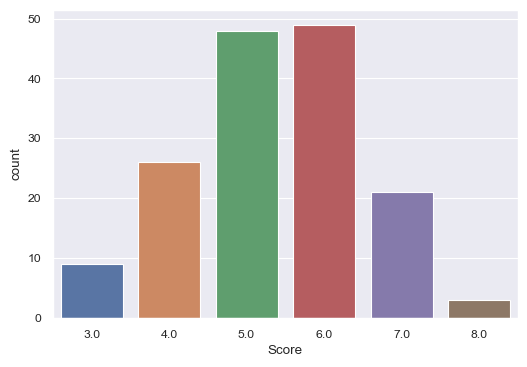

In [65]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df.Score.round(), data=df)
plt.show()

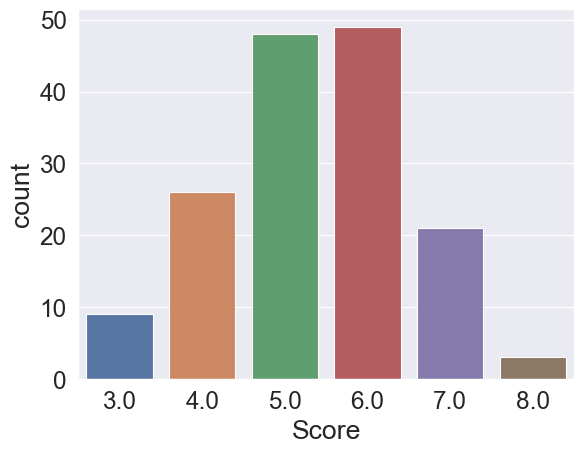

<Figure size 600x400 with 0 Axes>

In [68]:
fig, ax = plt.subplots()
sns.set_context("paper", font_scale=1)
plt.figure(figsize=(6, 4))
sns.countplot(x=df.Score.round(), data=df, ax=ax)
plt.show()

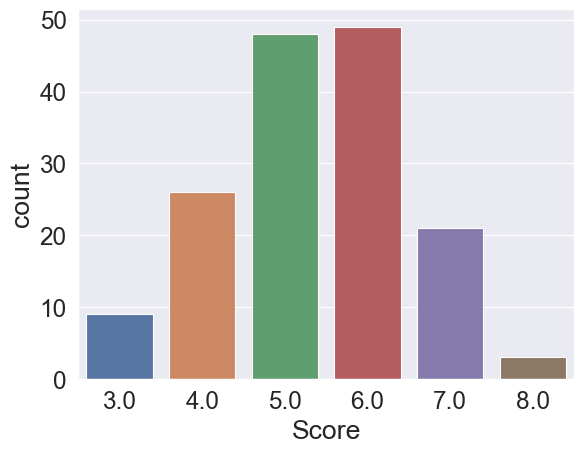

<Figure size 600x400 with 0 Axes>

In [67]:
fig, ax = plt.subplots()
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(6, 4))
sns.countplot(x=df.Score.round(), data=df, ax=ax)
plt.show()

In [72]:
books.shape

(550, 9)

In [71]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,User Rating (Round),Price (Above Average)
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,5,No
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,5,Yes
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,5,Yes
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,5,No
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,5,No


In [129]:
books.Author[books \
    .Reviews \
    .idxmax()]

'Delia Owens'

In [147]:
books.Author.describe()['top']

'Jeff Kinney'

In [163]:
books \
    [books['Price (Above Average)'] == 'Yes'] \
    ['User Rating'] \
    .mean()

4.560103626943005

In [109]:
yes, no

(4.616580310880829, 4.761904761904762)

In [173]:
yes = books \
    [books['Price (Above Average)'] == 'Yes'] \
    ['User Rating']

no = books \
    [books['Price (Above Average)'] == 'No'] \
    ['User Rating']
stats.levene(yes, no).pvalue

In [176]:
stats.levene(yes, no).pvalue

0.10402083833234736

In [174]:
yes

1      4.6
2      4.7
6      4.7
7      4.7
12     4.6
      ... 
528    4.7
533    4.8
534    4.8
537    4.4
538    4.5
Name: User Rating, Length: 193, dtype: float64

In [229]:
x = books['User Rating'].mean()

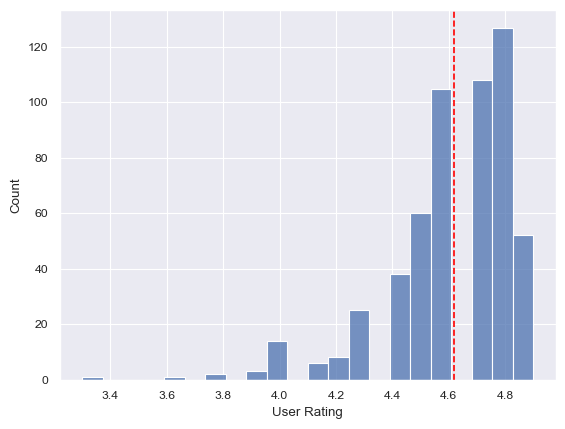

In [235]:
sns.histplot(books['User Rating'])
plt.axvline(books['User Rating'].mean(), linestyle='--', color='red')
plt.show()

In [214]:
books['User Rating'].mean()

4.618363636363637

In [238]:
stats.shapiro(books['User Rating']).pvalue

7.478150561592655e-21

In [250]:
stats.ttest_ind(yes, no).pvalue

8.190934970309897e-06

In [182]:
books.groupby('Price (Above Average)')['User Rating'].mean()

Price (Above Average)
No     4.649860
Yes    4.560104
Name: User Rating, dtype: float64

In [307]:
books.head(1)

,Name,Author,User Rating,Reviews,Price,Year,Genre,User Rating (Round),Price (Above Average)
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,5,No


In [340]:
wqe = books.Price.mean()

<Axes: >

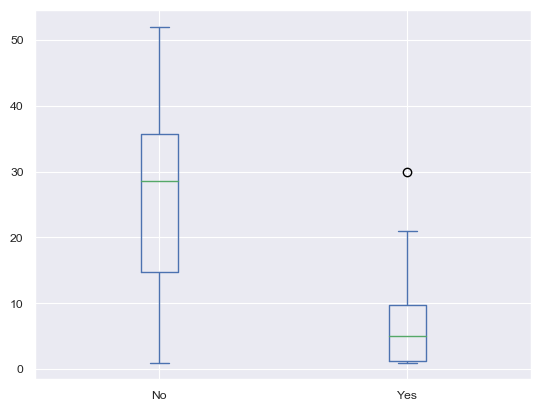

In [352]:
books \
    .groupby('Price (Above Average)') \
    .Price \
    .value_counts() \
    .unstack(0) \
    .plot(kind='box')


In [321]:
books \
    .Price \
    .value_counts() \
    .reset_index() \
    .sort_values('Price', ascending=False)

,index,Price
0,8,52
1,6,38
2,9,38
3,5,36
4,11,35
5,4,32
6,14,30
7,13,29
8,10,28
9,12,27


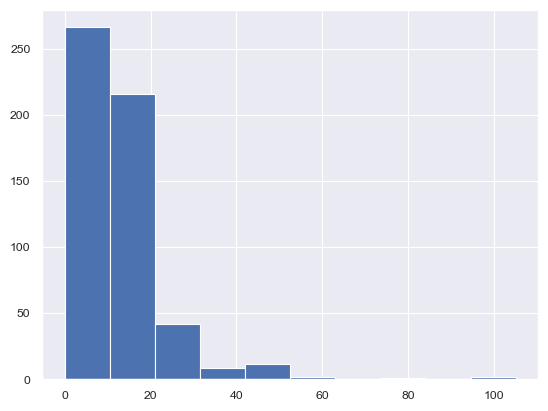

In [303]:
plt.hist(books['Price'])
plt.show()

In [ ]:
import pandas as pd
import scipy.stats as stats

books = pd.read_csv('books_prep.csv')

In [298]:
rate5 = books[books["User Rating (Round)"] == 5]['Reviews']
rate4 = books[books["User Rating (Round)"] == 4]['Reviews']
rate3 = books[books["User Rating (Round)"] == 3]['Reviews']

In [299]:
stats.f_oneway(rate3, rate4, rate5).pvalue

0.2973862975123414